# Lesson 1: Models, Simulations, Programming in Python

What are models?
- generally: a simplified representation of a system or phenomenon, used by people to understand and/or engineer the parts which are important to us.
- types of models:
    - physical models: a small scale reconstruction of a large structure, to help understand all the components and interrelations. 
    - biological models: using biological systems to represent a broader biological phenomenon. For example, human cancer can be studied in a mouse with induced cancer for the purpose of therapeutic discovery. Ecoli as a model of bacteria more generally.
    - mathematical model: using formal/mathematical equations to represent the system. Functions, with dependent and independent variables, represent the relationship between those variables and how the co-vary.
    - computational model: has algorithms that operate on a model to solve it. Because computers are fast and precise, this lets us solve much bigger problems.

What are simulations?
- the use of a model to predict an outcome, or behavior under different conditions.
- changing variables in a model to see how they affect the other variables, and the system as a whole.
- take a scientific/experimental approach to the model.
- This can apply to any model by changing variables/structures and studying the outcome, to learn about the real system. 
- can simulate relative to the model's purpose-specific objective. 

What does it mean to program? How does it help with modeling and simulation?
- a series of steps to acheive an outcome. Computer programs, a scheduled event, and experimental protocol?
- for a computational model, the program is the series of algorithms that allows us to manipulate the model.

## a mathematical model of exponential population growth:

$$
\frac{dP}{dt} = r*P
$$

- $P$ is a variable that represents a population size.
- $t$ represents time. $dt$ is a small interval of time.
- $\frac{dP}{dt}$ is the change in population with respect to time. 
- $r$ is a rate of change.
- the function is $f: (P, r) \mapsto \frac{dP}{dt}$

## define a computational function

In [21]:
def population_growth(P, r):
    dPdt = r * P
    return dPdt

In [2]:
P0 = 100  # initial population
r = 0.1   # growth rate

# solve the equation
dPdt = population_growth(P0, r)

# print the result
print(f'dPdt = {dPdt}')  # this is an f-string

dPdt = 10.0


## simulate with Euler integration

In [3]:
dt = 0.1         # this is the time interval for the simulation
total_time = 10  # this is the total time

t = 0            # time starts at 0
P = 10           # initial population
r = 0.1          # set the growth rate

# make a place to save the results
P_history = [P]

# run the simulation
while t<total_time: # condition for a while loop, to perform an action
    
    # get the growth rate
    dPdt = population_growth(P, r)
    
    # grow the population
    P += dPdt * dt
    
    # save the history
    P_history.append(P)
    
    # advance the current time by dt
    t += dt
    
print(f'RESULTS: {P_history}')

RESULTS: [10, 10.1, 10.201, 10.30301, 10.4060401, 10.510100501, 10.615201506010001, 10.721353521070101, 10.828567056280802, 10.93685272684361, 11.046221254112046, 11.156683466653167, 11.268250301319698, 11.380932804332895, 11.494742132376224, 11.609689553699987, 11.725786449236987, 11.843044313729356, 11.96147475686665, 12.081089504435317, 12.20190039947967, 12.323919403474468, 12.447158597509214, 12.571630183484306, 12.697346485319148, 12.82431995017234, 12.952563149674063, 13.082088781170803, 13.212909668982512, 13.345038765672337, 13.47848915332906, 13.61327404486235, 13.749406785310974, 13.886900853164084, 14.025769861695725, 14.166027560312681, 14.307687835915807, 14.450764714274966, 14.595272361417715, 14.741225085031893, 14.888637335882212, 15.037523709241034, 15.187898946333444, 15.339777935796779, 15.493175715154747, 15.648107472306295, 15.804588547029358, 15.962634432499652, 16.12226077682465, 16.283483384592895, 16.446318218438822, 16.61078140062321, 16.776889214629442, 16.9

# Lesson 2: odeint, plotting, and 2D systems
## simulate with scipy's odeint algorithm

In [4]:
import numpy as np                  # This is for arrays 
from scipy.integrate import odeint  # this is for numerical integration
import matplotlib.pyplot as plt     # this is for plotting

In [5]:
def population_growth2(P, t, r):
    dPdt = r * P
    return dPdt

In [6]:
# simulation parameters
t_time = 20
n_points = 100
t = np.linspace(0, t_time, n_points)

# initial conditions
P0  = 10
r = 0.1

# run the simulation
solution = odeint(population_growth2, P0, t, args=(r,))

Text(0.5, 1.0, 'Exponential Growth Model')

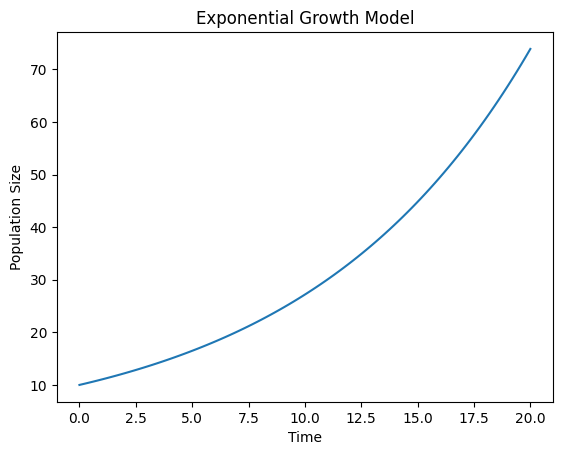

In [7]:
# plot 
plt.plot(t,solution)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Exponential Growth Model')

## Lotka-Volterra 2D predator-prey model

Lotka-Voltera equations:

1. Prey population growth:

$$ \frac{dP}{dt} = \alpha P - \beta PV $$

2. Predator populaton growth:
$$ \frac{dV}{dt} = \delta P*V - \gamma V $$

- $P$ is the prey population
- $V$ is the predator population 
- $\alpha$ is the growth rate of the prey
- $\beta$ is the predation rate on the prey
- $\delta$ is the efficiency of converting prey to predator
- $\gamma$ is death rate of predators

In [8]:
# lotka-volterra
def lotka_volterra(y, t, alpha, bet, delta, gamma):
    P, V = y
    dPdt = alpha * P - beta * P * V
    dVdt = delta * P * V - gamma * V
    return dPdt, dVdt

In [9]:
total_time = 40
n_points = 1001

# initial conditions and params
P0 = 10 # initial prey population
V0 = 5 # initial predator Population 
alpha = 1.0 # Prey growth
beta = 1.0 # Predation rate
delta = 1.0 # predator efficiency
gamma = 2.0 # predator death rate

# odeint inputs
y0 = [P0, V0]
t= np.linspace(0, total_time, n_points) # the time points

# simulate
solution = odeint(lotka_volterra, y0, t, args=(alpha, beta, delta, gamma))

In [10]:
# split out the individual variables
P_soln = solution[:,0]
V_soln = solution[:,1]
#print(f'PREY SOLUTION: {P_soln}')
#print(f'PREY SOLUTION: {V_soln}')

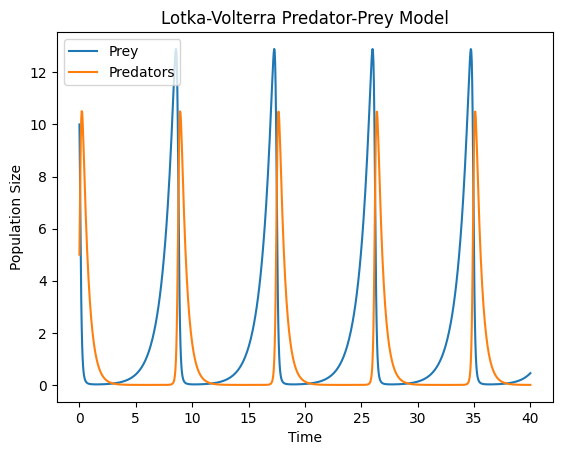

In [11]:
# plot the results
plt.plot(t, P_soln, label='Prey')
plt.plot(t, V_soln, label = 'Predators')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Lotka-Volterra Predator-Prey Model')
plt.legend()

## plot vector field phase diagram

In [12]:
#!pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets
from IPython.display import display

In [14]:
x_lim = 15
y_lim = 15
P_values = np.linspace(0,x_lim,20)
V_values = np.linspace(0,y_lim,20)

PP, VV = np.meshgrid(P_values, V_values)
dP, dV = lotka_volterra([PP, VV],  0, alpha, beta, delta, gamma)

Text(0, 0.5, 'predator population')

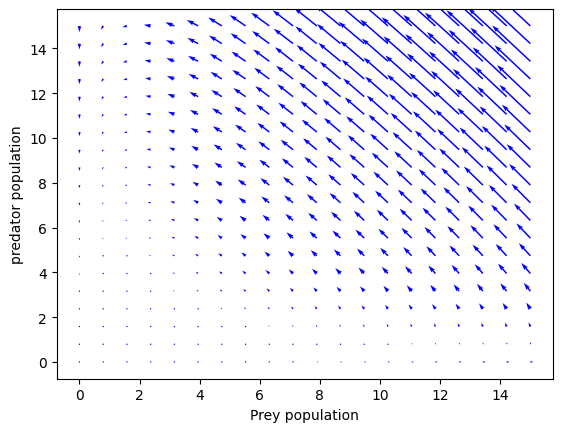

In [15]:
fig, ax = plt.subplots()  # Create a figure and axis
ax.quiver(PP, VV, dP, dV, color='blue')
ax.set_xlabel('Prey population')
ax.set_ylabel('predator population')

### overlay a trajectory

In [16]:
t = np.linspace(0, 15, 1000)  # Time range for the simulation
initial_conditions = [10, 5]  # Example initial conditions
trajectory = odeint(lotka_volterra, initial_conditions, t, args=(alpha, beta, delta, gamma))

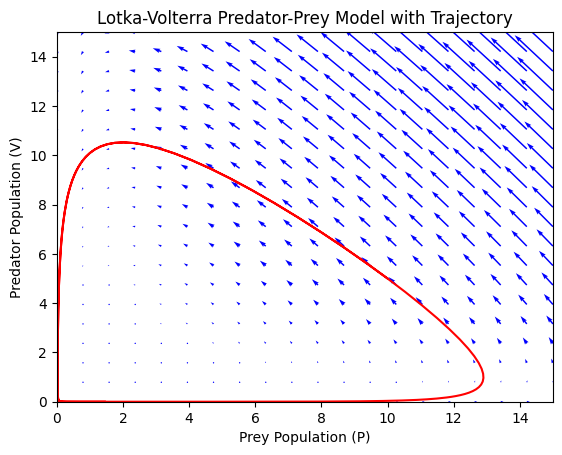

In [17]:
fig, ax = plt.subplots()  # Create a figure and axis
ax.quiver(PP, VV, dP, dV, color='blue')
ax.plot(trajectory[:, 0], trajectory[:, 1], 'r-')  # 'r-' for a red line
ax.set_xlabel('Prey Population (P)')
ax.set_ylabel('Predator Population (V)')
ax.set_title('Lotka-Volterra Predator-Prey Model with Trajectory')
ax.set_xlim([0, x_lim])
ax.set_ylim([0, y_lim])
plt.show()

### interactive vector field

In [18]:
def plot_lotka_volterra(alpha=1.1, beta=0.4, delta=0.1, gamma=0.4, P0=40, V0=9, total_time=15):
    t = np.linspace(0, total_time, 10000) 
    initial_conditions = [P0, V0]
    trajectory = odeint(lotka_volterra, initial_conditions, t, args=(alpha, beta, delta, gamma))
    max_P = max(trajectory[:,0])
    max_V = max(trajectory[:,1])

    P_values = np.linspace(0, max_P, 20)
    V_values = np.linspace(0, max_V, 20)
    PP, VV = np.meshgrid(P_values, V_values)
    dP, dV = lotka_volterra([PP, VV], 0, alpha, beta, delta, gamma)

    fig, ax = plt.subplots()
    ax.quiver(PP, VV, dP, dV, color='blue')
    ax.plot(trajectory[:, 0], trajectory[:, 1], 'r-')
    ax.set_xlim([-0.1 * max_P, max_P * 1.1])
    ax.set_ylim([-0.1 * max_V, max_V * 1.1])
    ax.set_xlabel('Prey Population (P)')
    ax.set_ylabel('Predator Population (V)')
    ax.set_title('Lotka-Volterra Model')
    plt.show()

In [19]:
widget = widgets.interactive(plot_lotka_volterra, 
                    alpha=widgets.FloatSlider(value=1.0, min=0, max=10, step=1),
                    beta=widgets.FloatSlider(value=1.0, min=0, max=10, step=1),
                    delta=widgets.FloatSlider(value=0.1, min=0, max=2, step=0.1),
                    gamma=widgets.FloatSlider(value=0.4, min=0, max=2, step=0.1),
                    P0=widgets.IntSlider(value=40, min=0, max=100, step=1),
                    V0=widgets.IntSlider(value=9, min=0, max=100, step=1),
                    total_time=widgets.IntSlider(value=15, min=0, max=100, step=1))

display(widget)

interactive(children=(FloatSlider(value=1.0, description='alpha', max=10.0, step=1.0), FloatSlider(value=1.0, …

# Lesson 3: generalized Lotka-Volterra

The Generalized Lotka-Volterra Equations for \( n \) species:

$$ \frac{dX_i}{dt} = X_i \left( r_i + \sum_{j=1}^{n} a_{ij} X_j \right) $$

where:
- $X_i$ is the population size of species $i$.
- $r_i$ is the intrinsic growth rate of species $i$.
- $a_{ij}$ represents the effect of species $j$ on species $i$, with:
  - $a_{ij} < 0$ indicating a negative impact (e.g., competition or predation).
  - $a_{ij} > 0$ indicating a positive impact (e.g., mutualism).

$$ \frac{dX_i}{dt} = r_i X_i +  \sum_{j=1}^{n} a_{ij} X_i X_j $$

In [51]:
# define generalized Lotka-Volterra function
def generalized_lotka_volterra(X, t, growth_rates, interactions):
    """
    Given n species
    definitions:
        - X is a list of species populations [X1, X2, ..., Xn]
        - t is the time over which to simulate
        - growth rates is a list of each species GR: [r1, r2, ..., rn]
        - interactions is a list of lists of size n*n
    """
    dX = []
    for i, x in enumerate(X):
        dx = growth_rates[i]*x
        
        interaction = 0
        for j in range(len(X)):
            interaction += interactions[i][j]*x*X[j]

        dx += interaction
        dX.append(dx)
    return dX
        
    # return [
    #     x * (growth_rates[i] + 
    #          sum([interactions[i][j] * X[j] for j in range(len(X))])
    #         ) for i, x in enumerate(X)
    # ]


In [63]:
# Initial populations
initial_population = [10, 5, 3]

# Intrinsic growth rates
growth_rates = [1.1, -0.4, 0.5]

# Interaction matrix
interactions = [[-0.1, 0.5, -0.3],
                [-0.4, -0.2, 0.5],
                [0.3, -0.5, -0.1]]

# Time points
t = np.linspace(0, 20, 1000)

# soln = generalized_lotka_volterra(initial_populations,t, growth_rates, interactions)
solution = odeint(generalized_lotka_volterra, initial_population, t, args=(growth_rates, interactions))

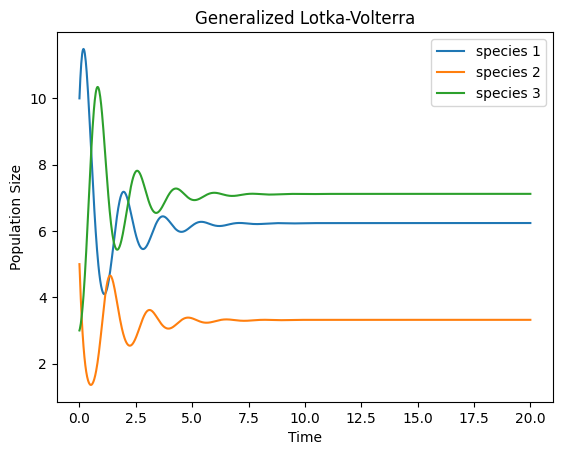

In [67]:
plt.plot(t, solution)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Generalized Lotka-Volterra')
plt.legend(['species 1', 'species 2', 'species 3'])

### plot in 3d

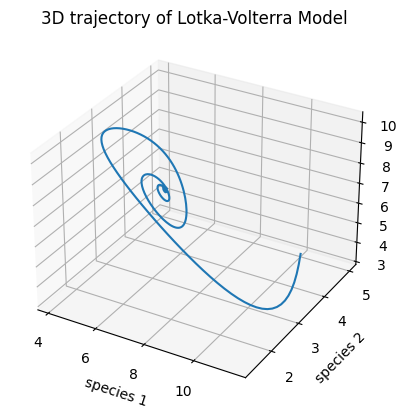

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(solution[:,0], solution[:,1], solution[:,2])
ax.set_xlabel('species 1')
ax.set_ylabel('species 2')
ax.set_zlabel('species 3')
ax.set_title('3D trajectory of Lotka-Volterra Model')
plt.show()

In [74]:
# make a reusable function
def simulate_gLV(initial_populations, growth_rates, interactions, total_time=20):
    t = np.linspace(0, total_time, 1000)
    solution = odeint(generalized_lotka_volterra, initial_populations, t, args=(growth_rates, interactions))
    return (solution, t)

def plot_timeseries_gLV(result):
    solution = result[0]
    t = result[1]
    n_species = len(solution[1,:])
    plt.plot(t, solution)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.title('Generalized Lotka-Volterra Model')
    plt.legend([f'Species {i}' for i in range(n_species)])
    plt.show()

def plot_quiver_2D(initial_populations, growth_rates, interactions, total_time=15):
    t = np.linspace(0, total_time, 100000) 
    
    # initial_conditions = [P0, V0]
    trajectory = odeint(generalized_lotka_volterra, initial_populations, t, args=(growth_rates, interactions))
    max_1 = max(trajectory[:,0])
    max_2 = max(trajectory[:,1])

    values_1 = np.linspace(0, max_1, 20)
    values_2 = np.linspace(0, max_2, 20)
    PP, VV = np.meshgrid(values_1, values_2)
    dP, dV = generalized_lotka_volterra([PP, VV], 0, growth_rates, interactions)

    fig, ax = plt.subplots()
    ax.quiver(PP, VV, dP, dV, color='blue')
    ax.plot(trajectory[:, 0], trajectory[:, 1], 'r-')
    ax.set_xlim([-0.1 * max_1, max_1 * 1.1])
    ax.set_ylim([-0.1 * max_2, max_2 * 1.1])
    ax.set_xlabel('Species 1')
    ax.set_ylabel('Species 2')
    ax.set_title('Lotka-Volterra Model')
    plt.show()

In [75]:
def plot_2d_lotka_volterra(initial_x, initial_y, growth_x, growth_y, x_x, x_y, y_x, y_y, total_time=20):
    initial_populations = [initial_x, initial_y]
    growth_rates = [growth_x, growth_y]
    interactions = [[x_x, x_y], [y_x, y_y]]
    plot_quiver_2D(initial_populations, growth_rates, interactions, total_time=total_time)

In [76]:
widget = widgets.interactive(
    plot_2d_lotka_volterra, 
    initial_x=widgets.FloatSlider(value=5, min=0, max=20, step=1),
    initial_y=widgets.FloatSlider(value=10, min=0, max=20, step=1),
    growth_x=widgets.FloatSlider(value=0.1, min=-2.0, max=2.0, step=0.1),
    growth_y=widgets.FloatSlider(value=0.1, min=-2.0, max=2.0, step=0.1),
    x_x=widgets.FloatSlider(value=-0.1, min=-1.0, max=1.0, step=0.1),
    x_y=widgets.FloatSlider(value=-0.2, min=-1.0, max=1.0, step=0.1),
    y_x=widgets.FloatSlider(value=-0.2, min=-1.0, max=1.0, step=0.1),
    y_y=widgets.FloatSlider(value=-0.1, min=-1.0, max=1.0, step=0.1),
    total_time=widgets.IntSlider(value=100, min=0, max=100, step=1)
)

display(widget)

interactive(children=(FloatSlider(value=5.0, description='initial_x', max=20.0, step=1.0), FloatSlider(value=1…

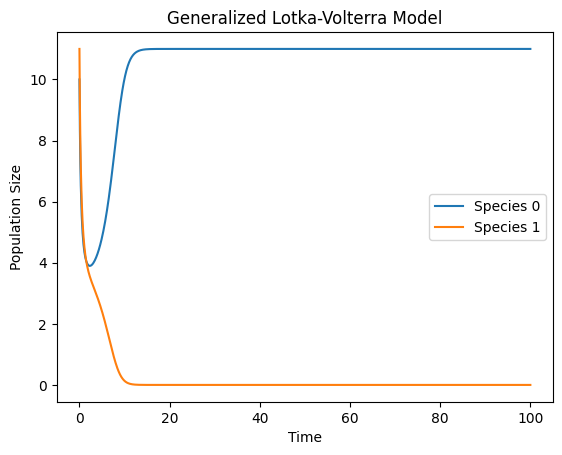

In [89]:
# Species populations at t=0
initial_populations = [10, 11]

# Intrinsic growth rates
growth_rates = [1.1, 1.0]

# Interaction matrix
interactions = [[-0.1, -0.2], [-0.2, -0.1]]

results = simulate_gLV(initial_populations, growth_rates, interactions, total_time=100)
plot_timeseries_gLV(results)